In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import (cross_val_score, train_test_split,
                                    GridSearchCV, RandomizedSearchCV)
from sklearn.preprocessing import Imputer
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
train = pd.read_csv('data/train_final.csv')
test = pd.read_csv('data/test_final.csv')
train = train.drop(['id'], axis=1)
test = test.drop(['id'], axis=1)

In [3]:
# Divide dataset into X and y
y = train.Y
X = train.drop(["Y"], axis=1)
X_test = test

In [4]:
# Impute missing features
from sklearn.preprocessing import Imputer

# train = train.apply(lambda x: x.fillna(x.value_counts().index[0]))
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
train_xform = imp.fit_transform(X)
# TODO: Impute dataframe so that F5 uses median
# and F19 uses mean. For now, we'll impute via mean for both.

X = pd.DataFrame(train_xform, columns=X.columns)
test_xform = imp.transform(X_test)
X_test = pd.DataFrame(test_xform, columns=X_test.columns)

X.head(5)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27
0,1.0,0.0,0.107576,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,104.0,22902.0,1.0,0.0,18.0,0.042295,1.0,0.0,27.0,0.028250
1,1.0,0.0,0.142357,0.0,0.0,7.0,1.0,1.0,1.0,1.0,...,144.0,11400.0,1.0,0.0,8.0,0.021417,1.0,0.0,67.0,0.253574
2,1.0,0.0,0.492318,0.0,3.0,4205.0,1.0,1.0,3.0,1.0,...,112.0,4833.0,1.0,0.0,13.0,0.502212,1.0,1.0,35.0,0.373397
3,1.0,0.0,-0.053028,0.0,2.0,2.0,1.0,1.0,5.0,2.0,...,127.0,3250.0,1.0,1.0,8.0,0.000000,1.0,0.0,50.0,0.674254
4,1.0,0.0,0.730797,0.0,0.0,11.0,1.0,1.0,1.0,1.0,...,148.0,4000.0,1.0,1.0,5.0,0.787592,1.0,0.0,71.0,0.371157


In [5]:
# Split data.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10, random_state=42)

([<matplotlib.patches.Wedge at 0x7f640534de10>,
  <matplotlib.text.Text at 0x7f640536bac8>])

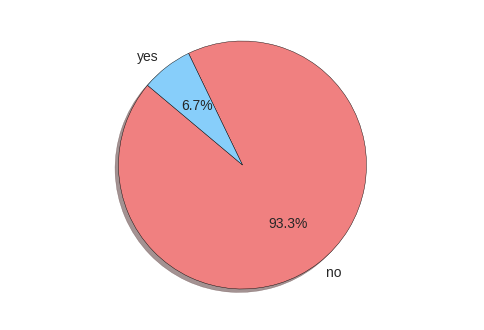

In [6]:
# Visualize the target variable.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots()
amounts = y.value_counts()
colors = ['lightcoral', 'lightskyblue']
labels = ['no', 'yes']
ax.axis('equal')
# _ = ax.title(label='Ratio of resources approved vs rejected')
ax.pie(amounts, labels=labels, colors=colors,
         autopct='%1.1f%%', shadow=True, startangle=140)

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

param_grid = {
              'penalty': ['l1', 'l2'],
              'C': np.power(10.0, np.arange(-3, 3)), 
             }

log_clf = GridSearchCV(LogisticRegression(), param_grid, cv=10, scoring='roc_auc', n_jobs=-1)
log_clf.fit(X_train, y_train)

KeyboardInterrupt: 

In [8]:
def write_results(outfile, predictions):
    ID = range(49999, 99998 + 1)
    with open(outfile, 'w') as f:
        f.write('id,Y\n')
        for instance, prediction in zip(ID, predictions):
            f.write('{},{}\n'.format(instance, prediction))

In [9]:
import hpsklearn

WARN: OMP_NUM_THREADS=None =>
... If you are using openblas if you are using openblas set OMP_NUM_THREADS=1 or risk subprocess calls hanging indefinitely


/home/aetherzephyr/anaconda3/envs/datasci/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
print("Best parameter set found on development set with cv={}:\n"
      .format(10))
print(log_clf.best_params_)
print("Best holdout score found on development set with cv={}:\n"
      .format(10))
print(log_clf.best_score_)
print()
score = log_clf.score(X_val, y_val)

print(log_clf.cv_results_['mean_train_score'])
print(log_clf.cv_results_['mean_test_score'])
print("Validation score:\n")
print(score)

Best parameter set found on development set with cv=10:



NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.